In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
## effect on size pred ?
comp_opt = pd.read_csv('../results-data/res3_cell-compositions/basan_2015_si_2017_taheri_2015_modulations.csv')
comp_opt = comp_opt.query('nutrient_type <= 11')

In [3]:
data = pd.read_csv('../results-data/normalized-geometry-data.csv')

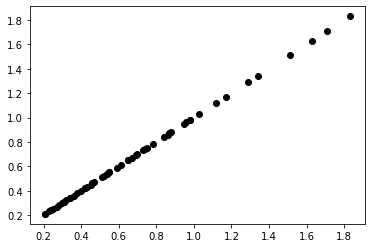

In [5]:
# check order.
plt.plot(comp_opt['growth_rate_per_hr'], data['growth_rate'],'ko')

In [7]:
def plot_data(df, propx, propy):

    plt.figure(figsize=(10,7))

    sns.scatterplot(data=df,
                    x=propx, 
                    y=propy, 
                    hue='modulation_type',
                    style='source',
                    palette={'cm':'b', 'nutrient':'g', 'useless':'r'},
                    s=100)

    for nutrient_type, datas in df.groupby('nutrient_type'):
        data_cm = datas.query("modulation_type == 'nutrient' or modulation_type == 'cm'")
        data_cm = data_cm.sort_values(['cm_type','growth_rate'],ascending=[True,False])
        plt.plot(data_cm[propx], data_cm[propy], 'b')
        data_useless = datas.query("modulation_type == 'nutrient' or modulation_type == 'useless'")
        data_useless = data_useless.sort_values(['useless_type','growth_rate'],ascending=[True,False])
        plt.plot(data_useless[propx], data_useless[propy], 'r')

    for _,datas in df.groupby('source'):
        data_nut = datas.query("modulation_type == 'nutrient'")
        data_nut = data_nut.sort_values('growth_rate')
        plt.plot(data_nut[propx], data_nut[propy], 'g')

In [16]:
mlr = LinearRegression()
comp_opt['model_u_no_zero'] = comp_opt['model_u'] + 0.000001
X = np.log(comp_opt[['model_e', 'model_r', 'model_u_no_zero', 'model_ra']])
y = np.log(data['volume'])
mlr.fit(X, y)
print(mlr.score(X, y))
print(mlr.intercept_)
print(mlr.coef_)
data['current_pred'] = np.exp(mlr.predict(X))

0.8932849593845615
0.2083708260016437
[-0.83025437 -0.4692255  -0.00290449  0.6563546 ]


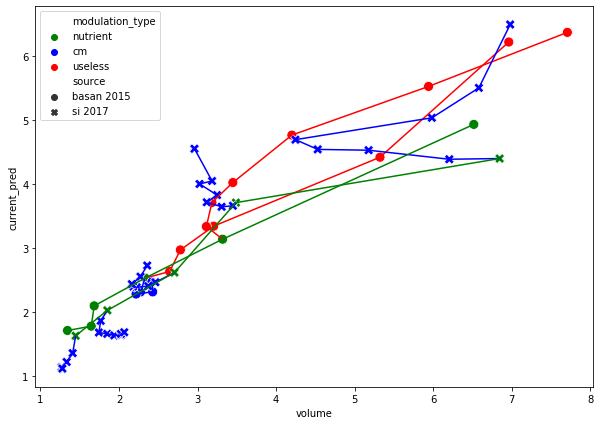

In [17]:
plot_data(data,'volume', 'current_pred')